## Malware detection Analysis and prediction



Malware detection is an important task in computer security. Malware can cause serious damage to systems and networks, but with malware detection you are to identify the malicious software that has infiltrated your system and take the necessary steps to neutralize it.

DQN (Deep Q-Networks) is a type of reinforcement learning algorithm that uses neural networks to learn the optimal action policy for a given task. In the context of malware detection, DQNs can be trained to learn the optimal malware detection policy on a given system.

**Required Libraries**

1.data colllecton
2 data cleaning


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import hashlib
import numpy as np
from tensorflow.keras.utils import plot_model





**Load Data**

In [ ]:
# Load the data offline
#Using Anaconda
data = pd.read_csv('example-train-label.csv', header=None, names=['hash', 'label'])



In [ ]:
#Using Google colab
#upload the data into your google drive first
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')
data=pd.read_csv('/content/drive/MyDrive/example-train-label.csv', header=None, names=['hash', 'label'])


Mounted at /content/drive


**Data Preprocessing**



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   hash    4800 non-null   object
 1   label   4800 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 75.1+ KB


In [ ]:
data.describe()

,label
count,4800.000000
mean,0.666667
std,0.471454
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


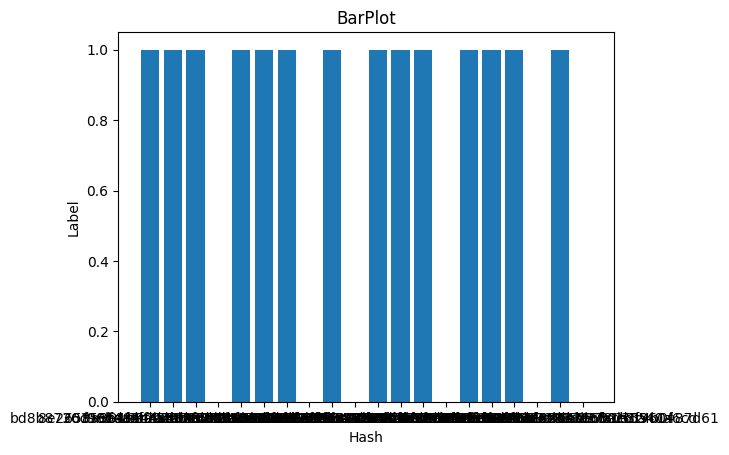

In [ ]:
plt.bar(data['hash'].head(20),data['label'].head(20))
plt.xlabel('Hash')
plt.ylabel('Label')
plt.title('BarPlot')
plt.show()

**Change hashed values to integers**

In [ ]:
def hash_features(hash_str, num_features):
    features = [0] * num_features
    for word in hash_str.split():
        idx = int(hashlib.md5(word.encode()).hexdigest(), 16) % num_features
        features[idx] += 1
    return features

In [ ]:
num_features = 1200 # set the desired number of features
X = [hash_features(hash_str, num_features) for hash_str in data['hash']]
y = data['label']


**Split the data**

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

X_train = np.array(X_train)

**Creating a Sequential Model for Binary Classification with Dense Layers**

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
history=model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=0)
y_pred = model.predict(X_test)
y_pred = [1 if y>=0.5 else 0 for y in y_pred]
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy*100)
print(len(y_pred))


38/38 [==============================] - 0s 2ms/step
Accuracy: 60.416666666666664


1200

In [ ]:

# reshape y_pred and y_true to 1D arrays
y_pred = np.reshape(y_pred, (len(y_pred),))
y_true = np.reshape(y, (len(y),))

# print out the predicted and true values side by side
for i in range(len(y_pred)):
    print('True value: {:.2f}, Predicted value: {:.2f}'.format(y[i], y_pred[i]))

True value: 1.00, Predicted value: 1.00
True value: 1.00, Predicted value: 1.00
True value: 1.00, Predicted value: 0.00
True value: 0.00, Predicted value: 1.00
True value: 1.00, Predicted value: 1.00
True value: 1.00, Predicted value: 0.00
True value: 1.00, Predicted value: 1.00
True value: 0.00, Predicted value: 1.00
True value: 1.00, Predicted value: 0.00
True value: 0.00, Predicted value: 1.00
True value: 1.00, Predicted value: 1.00
True value: 1.00, Predicted value: 1.00
True value: 1.00, Predicted value: 1.00
True value: 0.00, Predicted value: 1.00
True value: 1.00, Predicted value: 1.00
True value: 1.00, Predicted value: 1.00
True value: 1.00, Predicted value: 1.00
True value: 0.00, Predicted value: 1.00
True value: 1.00, Predicted value: 1.00
True value: 0.00, Predicted value: 1.00
True value: 0.00, Predicted value: 1.00
True value: 1.00, Predicted value: 1.00
True value: 0.00, Predicted value: 1.00
True value: 0.00, Predicted value: 1.00
True value: 1.00, Predicted value: 1.00


**Visualizations**

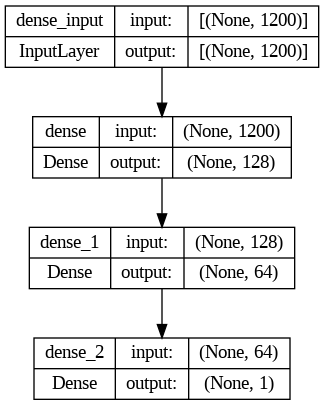

In [ ]:
plot_model(model, show_shapes=True)

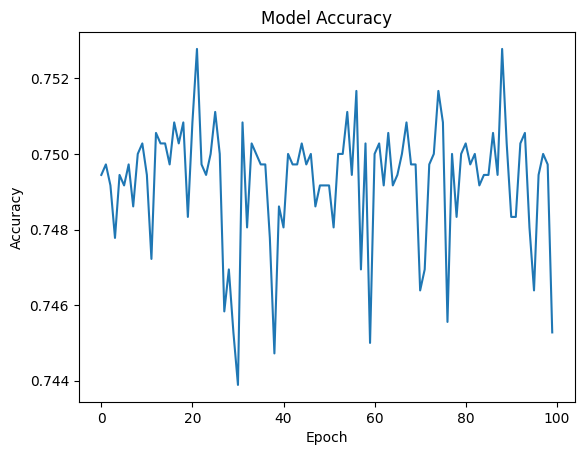

In [ ]:
# Get the accuracy and loss for each epoch from the history object
accuracy = history.history['accuracy']
loss = history.history['loss']

# Create a plot of the accuracy over time
plt.plot(accuracy)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()


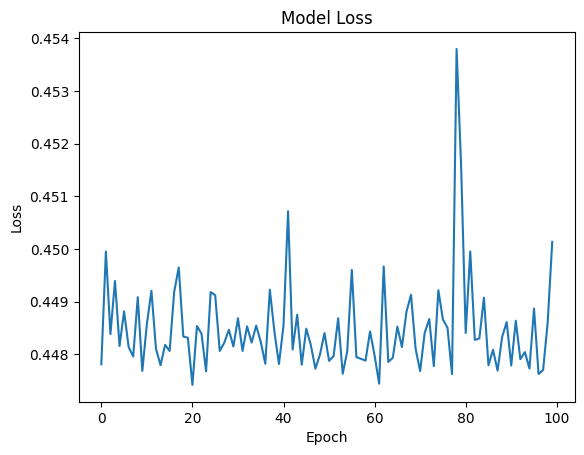

In [ ]:
# Create a plot of the loss over time
plt.plot(loss)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()